# The Spark Foundation :  GRIP  Jan-2021

## Task-1 : Pridiction Using Supervised Machine Learning
 Task-1 Description : Predict the percentage of an student based on the no. of study hours. 

## Author : BalajiPatil

In [1]:
# importing all the libraries required 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reading the data from given url

data_url = 'http://bit.ly/w-data'
student_data = pd.read_csv(data_url)

In [3]:
# Reading the first five values from student_data

student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the Shape of student_data

student_data.shape

(25, 2)

In [5]:
# Checking the data_types of the given columns from student_data

student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# Getting information from student_data 

student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Calculating Statistical data from student_data

student_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [8]:
# Checking is there any Null Values in student_data

student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization :

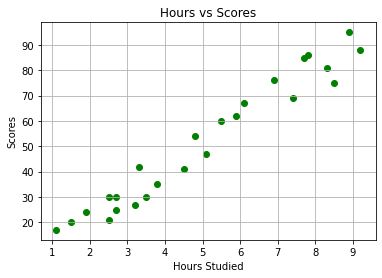

In [10]:
# Checking is there any relationship between the data

plt.scatter(student_data['Hours'], student_data['Scores'], color='g')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.grid()
plt.show()

From abow graph we can see that there is positive relation between Hours and Scores

# Preparing the data

In [11]:
# Divide the data into two parts 
# X- is inputs
# y- is output

X = student_data[['Hours']].values
y = student_data['Scores'].values

In [12]:
# split this data into training and test sets with the help of Scikit-Learn's built-in train_test_split() method

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Applying the LinearRegression model to data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# making predictions

y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Calculating the intercept

print(model.intercept_)

2.018160041434683


In [16]:
# Calculating the coefficient 

print(model.coef_)

[9.91065648]


In [17]:
# Calculating the straight line equation 

y_new = model.intercept_ + X*model.coef_

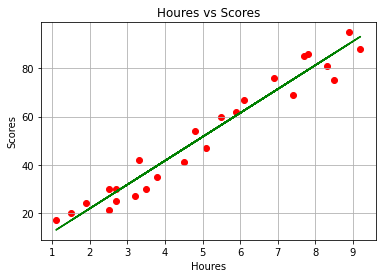

In [18]:
# Ploting the best-fit line for given equation

plt.scatter(X, y, color='r')
plt.plot(X, y_new, color='g')
plt.xlabel('Houres')
plt.ylabel('Scores')
plt.title('Houres vs Scores')
plt.grid()
plt.show()

In [19]:
# Comparing the Actual vs Predicted Values

data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Training Score

model.score(X_train, y_train)

0.9515510725211553

In [21]:
# Test Score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105356

In [22]:
# Predicted score if a student studies for 9.25 hrs/ day?

future_value = model.predict([[9.25]])
print(f'For 9.25 hrs/day the predicted score is : {future_value[0]}')

For 9.25 hrs/day the predicted score is : 93.69173248737538
